<a href="https://colab.research.google.com/github/alexzendersen/stat_practice/blob/main/HW4_pd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
flights = pd.read_csv("./drive/MyDrive/datasets/flights.csv", low_memory=False)
df = flights.copy()
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [5]:
df.isna().sum()

,0
YEAR,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE,0
FLIGHT_NUMBER,0
TAIL_NUMBER,14721
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0


In [6]:
df = df.dropna(subset = ['DEPARTURE_DELAY'])
df.head(20)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isna().sum()
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [8]:
airlines = pd.read_csv("./drive/MyDrive/datasets/airlines.csv", low_memory=False)
airports = pd.read_csv("./drive/MyDrive/datasets/airports.csv", low_memory=False)

In [9]:
df[df['DEPARTURE_DELAY'] < 0] = 0

In [10]:
airlines = { airlines.iloc[i, 0] : airlines.iloc[i, 1] for i in range(len(airlines))}

In [11]:
airlines

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

In [12]:
df = df[(df["ORIGIN_AIRPORT"].apply(str).apply(len) == 3) & (df["DESTINATION_AIRPORT"].apply(str).apply(len) == 3)]

In [13]:
df['ORIGIN_AIRPORT'].unique().shape

(322,)

In [14]:
delay_means = df.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])['DEPARTURE_DELAY'].mean().reset_index()
delay_means = delay_means.iloc[1:]
delay_means

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY
1,ABE,DTW,42.486486
2,ABE,ORD,44.886364
3,ABI,DFW,39.376997
4,ABQ,ATL,36.711207
5,ABQ,BWI,20.665605
...,...,...,...
4635,XNA,ORD,55.172798
4636,XNA,SFO,53.500000
4637,YAK,CDV,32.387500
4638,YAK,JNU,20.918033


# СОВЕТ 1

In [15]:
delay_by_day = df.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values().reset_index().iloc[-30:-1]
# delay_by_day.sort_values().reset_index().iloc[-20:-1]

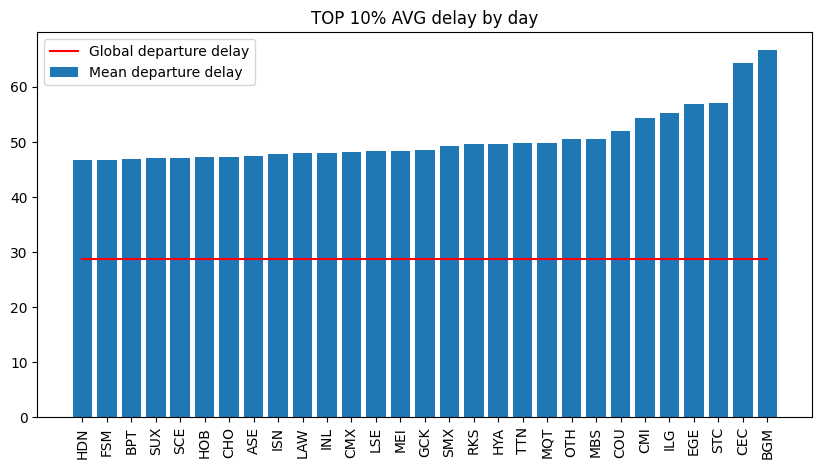

In [18]:
plt.figure(figsize = (10, 5))
plt.title("TOP 10% AVG delay by day")
plt.xticks(rotation=90)
plt.bar(delay_by_day['ORIGIN_AIRPORT'], delay_by_day['DEPARTURE_DELAY'], label = "Mean departure delay")
plt.plot(delay_by_day['ORIGIN_AIRPORT'], np.full((29,), df['DEPARTURE_DELAY'].mean()), color = 'red', label = "Global departure delay")
plt.legend(loc='best')
plt.show()

Совет: Увеличить количество полос в этих аэропортах, так как у них задержка в среднем в **2** раза больше, чем общая средняя задержка

# СОВЕТ 2

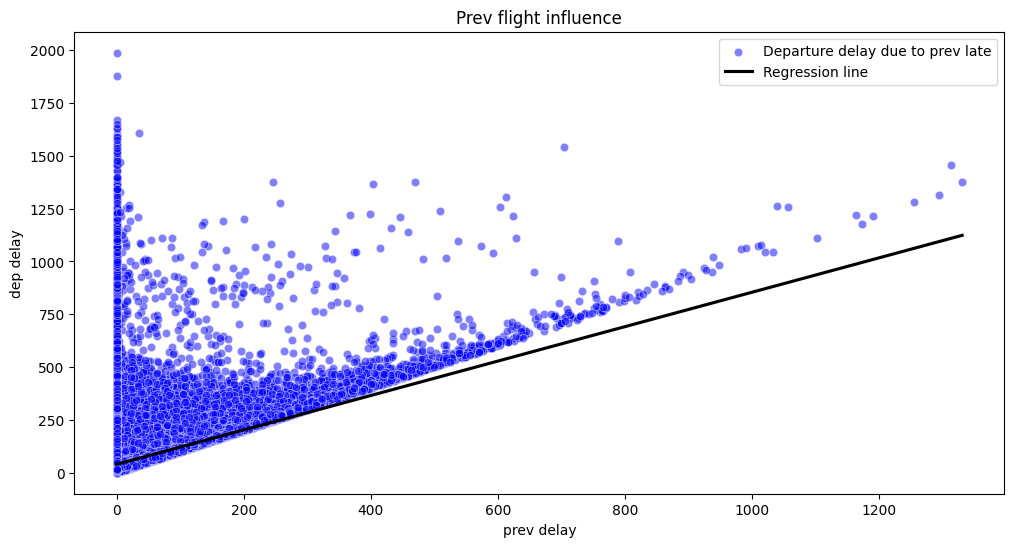

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='LATE_AIRCRAFT_DELAY', y='DEPARTURE_DELAY', data=df, alpha=0.5, color='blue', label = "Departure delay due to prev late")
sns.regplot(x='LATE_AIRCRAFT_DELAY', y='DEPARTURE_DELAY', data=df, scatter=False, color='black', label = "Regression line")
plt.title('Prev flight influence')
plt.xlabel('prev delay')
plt.ylabel('dep delay')
plt.legend(loc='best')
plt.show()

Совет: нужно **увеличить** буфер между вылетами, чтобы опоздание предыдущего самолета не порождало цепь задержек

# СОВЕТ 3

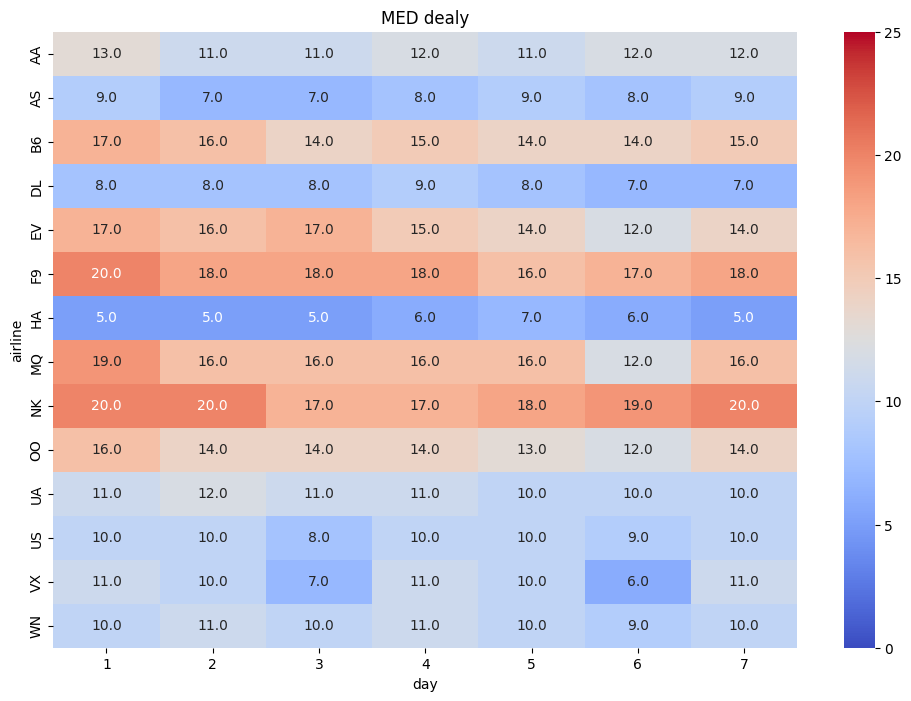

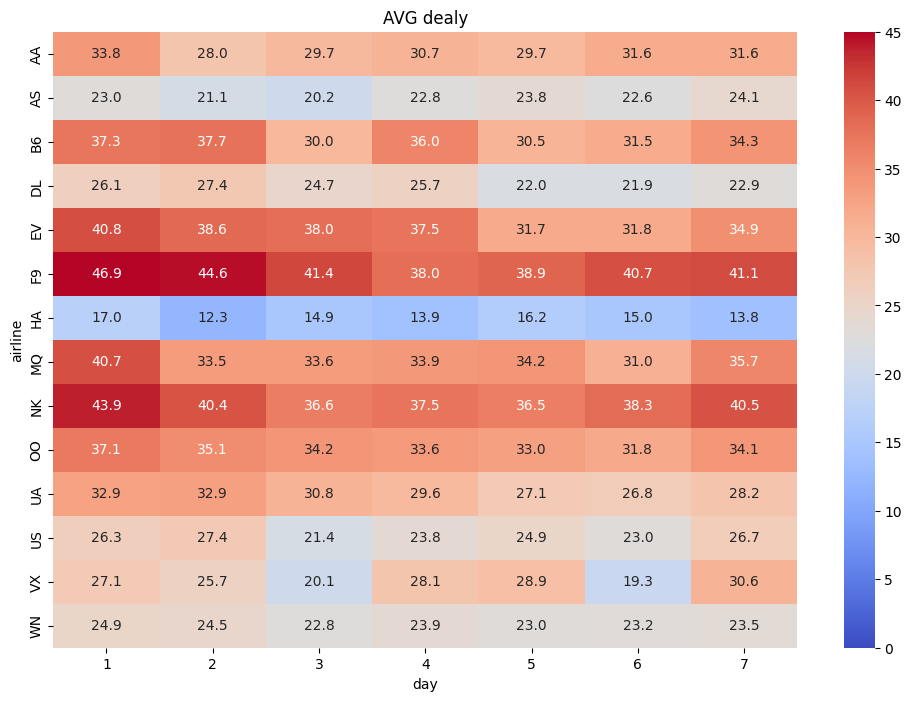

In [16]:
delay_means = df.groupby(['DAY_OF_WEEK', 'AIRLINE'])['DEPARTURE_DELAY'].median().reset_index()
delay_pivot = delay_means.pivot(index='AIRLINE', columns='DAY_OF_WEEK', values='DEPARTURE_DELAY')

plt.figure(figsize=(12, 8))
sns.heatmap(delay_pivot, annot=True, cmap='coolwarm', fmt='.1f', vmin=0, vmax=25)
plt.title('MED dealy')
plt.xlabel('day')
plt.ylabel('airline')
plt.show()

delay_means = df.groupby(['DAY_OF_WEEK', 'AIRLINE'])['DEPARTURE_DELAY'].mean().reset_index()
delay_pivot = delay_means.pivot(index='AIRLINE', columns='DAY_OF_WEEK', values='DEPARTURE_DELAY')

plt.figure(figsize=(12, 8))
sns.heatmap(delay_pivot, annot=True, cmap='coolwarm', fmt='.1f', vmin=0, vmax=45)
plt.title('AVG dealy')
plt.xlabel('day')
plt.ylabel('airline')
plt.show()

Вывод: как мы видим, на данной тепловой карте 2-3 авиакомпании имеют наибольшее число задержек. Им стоит пересмотреть свои рейсы, например пустить больше рейсов или же пересмотреть расписание, так как причины задержек могут быть связаны с отсутствием буферов.

# СОВЕТ 4

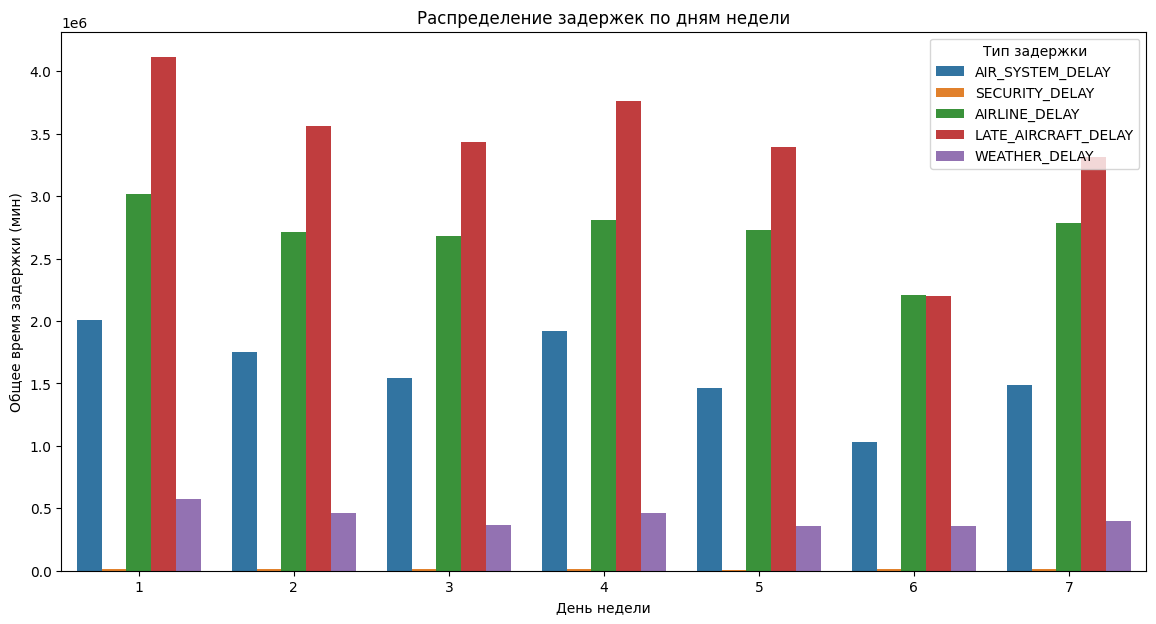

In [ ]:
delay_types = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df_delays = df.groupby('DAY_OF_WEEK')[delay_types].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(
    x='DAY_OF_WEEK',
    y='value',
    hue='variable',
    data=df_delays.melt(id_vars='DAY_OF_WEEK', value_vars=delay_types)
)
plt.title('Распределение задержек по дням недели')
plt.xlabel('День недели')
plt.ylabel('Общее время задержки (мин)')
plt.legend(title='Тип задержки')
plt.show()

Как мы видим, помимо задержек из-за предыдущих самолетов, есть задежрка, связанная с воздушными системами. Соотвественно, чтобы их избежать, нужно пересмотреть работу этих систем: стабилизировать связь между ними, увеличить количество проверок или контролирующих органов.

# СОВЕТ 5

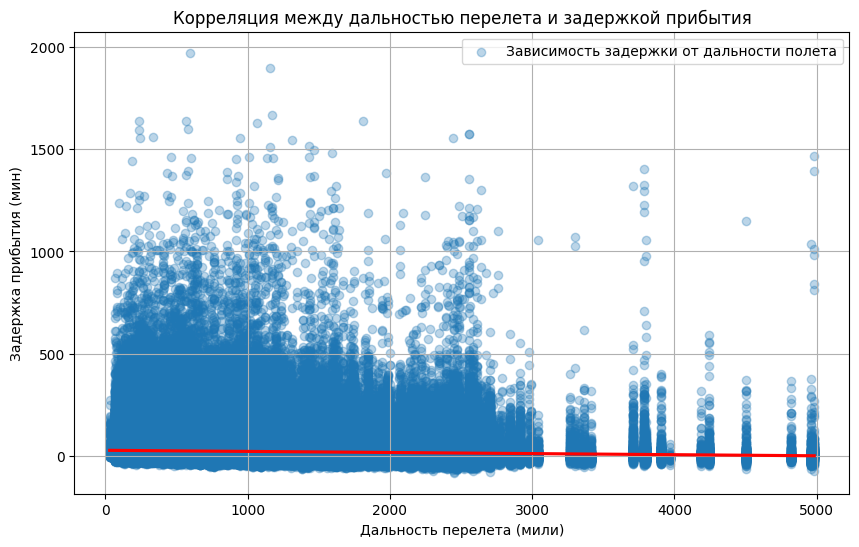

In [18]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='DISTANCE',
    y='ARRIVAL_DELAY',
    data=df,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'},
    label = "Зависимость задержки от дальности полета"
)
plt.title('Корреляция между дальностью перелета и задержкой прибытия')
plt.xlabel('Дальность перелета (мили)')
plt.ylabel('Задержка прибытия (мин)')
plt.grid(True)
plt.legend(loc='best')
plt.show()

Таким образом, мы видим, что в целом, задержка маленькая и равномерная, как нам показывает kws, но так происходит не всегда и в основном, на коротких рейсах, что логично, так как они являются рабочими. Поэтому предлагается увеличить количество самолетов для этих рейсов. Для рейсов большой дальности этого можно не делать